In [1]:
import numpy as np
import matplotlib.pyplot as plt

rho:	 [0.8569893  0.10485905 0.02361172 0.01175298 0.00278695]
cumsum:	 [0.8569893  0.96184835 0.98546007 0.99721305 1.        ]


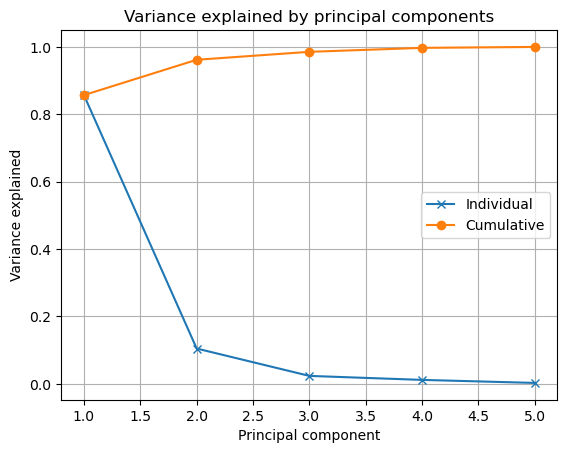

In [2]:
## Q3
# S: sigma, not squared
S = np.array([19.64,6.87,3.26,2.3,1.12])

# rho: variance explained by each PC
rho = (S*S) / (S*S).sum()
print(f'rho:\t {rho}')

# cumulative sum
cumsum = np.cumsum(rho)
print(f'cumsum:\t {cumsum}')

plt.figure()
plt.plot(range(1, len(rho)+1), rho, 'x-')
plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual', 'Cumulative'])
plt.grid()
plt.show()

In [3]:
## Q6
K = 2
density_o3 = K/(0.9+1.0)
density_o2 = K/(1.0+1.3)
density_o5 = K/(0.9+1.3)

ard = density_o3*K/(density_o2 + density_o5)
ard

1.183625730994152

In [4]:
x1 = -0.06
x2 = -0.28
x3 = 0.43
x4 = -0.3
x5 = -0.36
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 1

temp = 1.41 + 0.76*x1 + 1.76*x2 - 0.32*x3 - 0.96*x4 + 6.64*x5 \
- 5.13*c1 - 2.06*c2 + 96.73*c3 + 1.03*c4 - 2.74*c5

y_hat = 1/(1+np.exp(-temp))
y_hat       # probability of being positive class

0.01616833675669645

In [5]:
## Q10
TP = 34
FN = 11
FP = 7
TN = 39

precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*precision*recall/(precision+recall)
F1

0.7906976744186047

In [6]:
## Q11
def draw_ROC_curve(y_hat,y_true):
    """
    Input: y_true values estimated from a 1-dimension observation,
           y_hat values based on class membership
    Output: Jaccard similarity and Rand index.
    """
    
    import matplotlib.pyplot as plt
    
    if len(y_hat)!=len(y_true):
        raise ValueError("y_hat and y_true have different array lengths")
        
    n = len(y_hat)
    n_positive = y_true.count(1)
    n_negative = y_true.count(0)
    print(f'n_positive: {n_positive}, n_negative: {n_negative}')
    
    TPR = [1]
    FPR = [1]
    for i in range(n):
        TP = 0
        FP = 0
        threshold = y_hat[i]
        for j in range(n):
            if y_hat[j] > threshold and y_true[j]==0:
                FP+=1
            if y_hat[j] > threshold and y_true[j]==1:
                TP+=1
        TPR.append(TP/n_positive)
        FPR.append(FP/n_negative)
        
    plt.plot(FPR,TPR)
    plt.grid()
    plt.axis('square')
    plt.show()
    

n_positive: 3, n_negative: 8


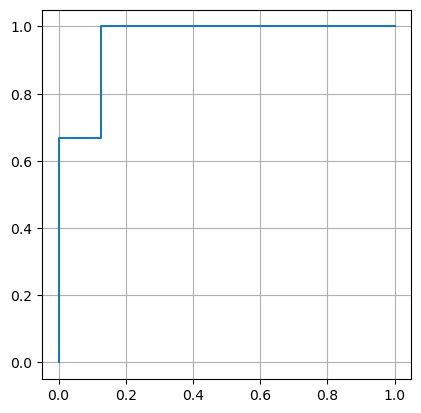

In [7]:
import numpy as np

y_hat = np.linspace(0,1,11)

y_true = [0,0,0,0,0,0,0,0,1,1,1] # c1
y_true = [0,0,0,0,0,0,0,1,1,0,1] # c1
# y_true = [1,1,1,1,1,1,0,1,0,1,0] # c3
y_true = [0,0,0,0,0,0,0,1,0,1,1] # c4

draw_ROC_curve(y_hat,y_true)

In [8]:
## Q13
M = 3
K1 = 4
K2 = 7
n_trained = (K2*M+1)*K1
n_test = (K2*M+1)*K1
total = n_trained*20 + n_test
total

1848

In [9]:
## Q15
p_africa = 0.154
numerator =  0.286*p_africa
prob = numerator/(numerator + 0.688*(1-p_africa))
prob

0.07034748886745079

In [10]:
## Q16 (WRONG, it's much simpler than this)
a = 1
num = (0+a)/(7+2*a)*(7/11)
denom = num \
        + (1+a)/(1+2*a)*(1/11) \
        + (1+a)/(2+2*a)*(2/11) \
        + (1+a)/(1+2*a)*(1/11)
prob = num/denom
prob

0.24999999999999994

In [11]:
## Q17
p_y1 = 3/11
p_y0 = 1-p_y1
num = (1/3)*(2/3)*p_y1
denom = num + (8/8)*(1/8)*p_y0
prob = num/denom
prob

0.39999999999999997

In [12]:
print(2/9,1/3,2/5,16/25)

0.2222222222222222 0.3333333333333333 0.4 0.64


In [13]:
## Q18
I_parent = 1 - (8/11)**2 - (3/11)**2
I_left = 1 - (2/4)**2 - (2/4)**2
I_right = 1 - (6/7)**2 - (1/7)**2

pg = I_parent - 4/11*I_left - 7/11*I_right
pg

0.05903187721369535

In [14]:
## Q19
def compute_similarity(Z,Q):
    """
    Input: labels of clusters in set Z and Q, 
    Output: Jaccard similarity and Rand index.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    Q = list(map(int,Q.split(" ")))
    Z = list(map(int,Z.split(" ")))

    print(f'Q: {Q}')
    print(f'Z: {Z}\n')

    _,n_Q = np.unique(Q, return_counts=True)
    _,n_Z = np.unique(Z, return_counts=True)
    N = len(Q)
    q_clusters = len(n_Q)
    z_clusters = len(n_Z)
    n = np.zeros((z_clusters,q_clusters),dtype='int32')

    for i in range(N):
        Q_idx = Q[i]-1
        Z_idx = Z[i]-1
        if Q[i]==Z[i]: # same cluster
            n[Q_idx,Q_idx] += 1
        else:          # diff cluster
            n[Z_idx,Q_idx] += 1

    S = 0
    for i in range(z_clusters):
        for j in range(q_clusters):
            S += n[i,j]*(n[i,j]-1)/2

    sum_term_z = 0
    for i in range(z_clusters):
        sum_term_z += n_Z[i]*(n_Z[i]-1)/2

    sum_term_q = 0
    for i in range(q_clusters):
        sum_term_q += n_Q[i]*(n_Q[i]-1)/2

    D = N*(N-1)/2 - sum_term_q - sum_term_z + S

    jaccard = S/(0.5*N*(N-1)-D)
    rand = (S+D)/(0.5*N*(N-1))

    print(f'n: \n{n}')
    print(f'n_Q: {n_Q}')
    print(f'n_Z: {n_Z}\n')
    print(f'S: {S}')
    print(f'D: {D}')
    print(f'jaccard similarity: {jaccard:.4f}')
    print(f'rand index: {rand:.4f}')

In [15]:
Z = '0 0 0 0 0 0 0 0 1 1 0'
Q = '0 0 0 0 0 0 0 0 1 1 1'
compute_similarity(Z,Q)

Q: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Z: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]

n: 
[[2 0]
 [1 8]]
n_Q: [8 3]
n_Z: [9 2]

S: 29.0
D: 16.0
jaccard similarity: 0.7436
rand index: 0.8182


In [16]:
## Q20
0.3*11

3.3

In [17]:
## Q24
p = 0.6*0.2 + 1*0.4 + 1.6*0.3
p

1.0

In [18]:
## Q25
import numpy as np

def distance(x, y, p):
    if p == 'inf':
        d = np.max(np.abs(x-y))
    else:
        d = np.power(np.sum(np.power(np.abs(x-y),p)) , (1/p))
    return d

x = np.array([-1.24, -0.26, -1.04])
y = np.array([-0.6, -0.86, -0.5])

d = distance(x, y, 1)
print("d: ", d)
d = distance(x, y, 4)
print("d: ", d)
d = distance(x, y, 'inf')
print("d: ", d)

d:  1.78
d:  0.7863759868045784
d:  0.64


In [19]:
## cosine similarity
x@y.T/(np.linalg.norm(x)*np.linalg.norm(y))

0.7812067103167513

In [20]:
np.sqrt(x@x.T) == np.linalg.norm(x)

True

In [21]:
## Q27
T = 4
y1_test = [0,1,0,0]   # cross
y2_test= [0,1,1,1]    # square

e_values = [0.417, 0.243, 0.307, 0.534]
a_values = [0.5*np.log((1-e)/e) for e in e_values]
a_values

[0.16755048227584546,
 0.5681509050484501,
 0.40709112580135304,
 -0.06810510241727454]

In [22]:
y1_score = [0,0]
for i in range(T):
    if y1_test[i]==0:
        y1_score[0] += a_values[i]
    else:
        y1_score[1] += a_values[i]
        
y2_score = [0,0]
for i in range(T):
    if y2_test[i]==0:
        y2_score[0] += a_values[i]
    else:
        y2_score[1] += a_values[i]
        
print(np.argmax(y1_score))
print(np.argmax(y2_score))

1
1
